# Testing Nsaba Functionality

##### Current Methods
- get_aba_ge()
- ge_ratio()
- get_ns_act()
- make_ge_ns_mat()
- coords_to_ge()

In [1]:
%matplotlib inline
from nsaba.nsaba import Nsaba
from nsaba.nsaba.visualizer import NsabaVisualizer
import numpy as np
import os
import matplotlib.pyplot as plt
import pandas as pd
import itertools

In [2]:
%load_ext line_profiler

In [3]:
# Simon Path IO

data_dir = '../../data_dir'
os.chdir(data_dir)
Nsaba.aba_load()
Nsaba.ns_load()

This may take a minute or two ...
SampleAnnot.csv loaded.
MicroarrayExpression.csv loaded.
Probes.csv loaded.
Nsaba.aba['mni_coords'] initialized.

This may take a minute or two ...
database.txt loaded.
features.txt loaded.
Nsaba.ns['mni_coords'] initialized.



In [ ]:
#Torben Path IO

ns_path = "/Users/Torben/Documents/ABI analysis/current_data_new/"
aba_path = '/Users/Torben/Documents/ABI analysis/normalized_microarray_donor9861/'

Nsaba.aba_load(aba_path)
Nsaba.ns_load(ns_path)

In [4]:
# Loading gene expression for all ABA registered Entrez IDs.
A = Nsaba()
A.load_ge_pickle('Nsaba_ABA_ge.pkl')
%time A.get_ns_act('attention', thresh = -1)
A.get_ns_act('reward')

This may take a minute or two ...
'ge' dictionary successfully loaded
This may take a few minutes...
CPU times: user 31.3 s, sys: 581 ms, total: 31.9 s
Wall time: 32 s
This may take a few minutes...


In [5]:
# Testing ge_ratio()
A = Nsaba()
A.ge_ratio((1813,1816))

array([ 0.57446139,  0.99023239,  1.11575466,  1.01100606,  0.90041432,
        0.51675821,  0.60023131,  0.79145099,  0.49431709,  0.48482013,
        0.69057069,  0.81420569,  0.47455972,  0.84989612,  0.62712447,
        0.63073593,  0.53755516,  0.44417201,  0.58291914,  0.442529  ,
        0.57296542,  0.66765314,  0.78020594,  0.60869062,  1.17611206,
        1.2758823 ,  0.6127578 ,  0.57277835,  1.10183741,  0.5111504 ,
        0.54529738,  0.50251657,  0.7318342 ,  0.94982714,  0.82175693,
        0.74350377,  1.06186932,  1.32446539,  0.45594681,  0.43065786,
        0.5671627 ,  0.59765326,  0.47546101,  0.46028177,  0.5367075 ,
        0.46101267,  0.42851074,  0.54803596,  0.56806979,  0.46818031,
        0.47677465,  0.41901151,  0.57470563,  0.48748218,  0.43258916,
        0.4557625 ,  0.48683465,  0.55563527,  0.63151196,  0.56402208,
        0.46587026,  0.59480653,  0.60864499,  0.50248616,  0.57100629,
        0.51971739,  0.50266858,  0.49048015,  0.5850243 ,  0.59

### Coordinates to gene expression:

Provide a list of coordinates and entrez_ids and the function will return matrix of coordinates by gene expression

In [6]:
rand = lambda null: np.random.uniform(-10,10,3).tolist()
coord_num = 20
coords = [rand(0) for i in range(coord_num)]

A.coords_to_ge(coords, entrez_ids=[1813,1816], search_radii=8)

array([[ 4.46098545,  5.56290643],
       [ 6.10550948,  5.81598194],
       [ 5.49340693,  5.85582506],
       [ 6.16328081,  5.75113376],
       [ 4.59995825,  6.51853235],
       [ 5.54722688,  5.83684735],
       [ 5.95456259,  5.76134138],
       [ 3.75308604,  4.77731621],
       [ 5.62745438,  5.7942564 ],
       [ 3.88491976,  6.30668048],
       [ 4.30003925,  5.21318464],
       [ 4.65774472,  5.51680598],
       [ 5.83086712,  5.76739085],
       [ 4.64030036,  6.68383691],
       [ 5.64121372,  6.11691668],
       [ 4.50806372,  6.07487379],
       [ 4.84681105,  5.87540839],
       [ 3.54018647,  6.50701842],
       [ 3.86313015,  4.78370111],
       [ 5.73868657,  6.04158638]])

In [7]:
A.get_aba_ge([733,33,88])

In [8]:
A.get_ns_act("attention", thresh=-1, method='knn')

# You can use the sphere method too, if you want to weight by bucket. 
# e.g:
# A.get_ns_act("attention", thresh=.3, method='sphere')

A.make_ge_ns_mat('attention', [733, 33, 88])

This may take a few minutes...


array([[  1.77019499e+00,   2.71416887e+00,   7.37862011e+00,
          1.69450157e-02],
       [  2.61296890e+00,   2.59225281e+00,   9.75253298e+00,
          4.37812120e-03],
       [  3.68978274e+00,   2.46659906e+00,   1.04777183e+01,
          8.46056433e-03],
       ..., 
       [  4.31693813e+00,   2.73499764e+00,   8.83434632e+00,
          0.00000000e+00],
       [  3.85346407e+00,   2.75270006e+00,   8.90296164e+00,
          2.18180238e-03],
       [  3.77839228e+00,   2.63289585e+00,   7.94519592e+00,
          0.00000000e+00]])

In [9]:
A.make_ge_ns_mat('attention', [733, 33, 88])

array([[  1.77019499e+00,   2.71416887e+00,   7.37862011e+00,
          1.69450157e-02],
       [  2.61296890e+00,   2.59225281e+00,   9.75253298e+00,
          4.37812120e-03],
       [  3.68978274e+00,   2.46659906e+00,   1.04777183e+01,
          8.46056433e-03],
       ..., 
       [  4.31693813e+00,   2.73499764e+00,   8.83434632e+00,
          0.00000000e+00],
       [  3.85346407e+00,   2.75270006e+00,   8.90296164e+00,
          2.18180238e-03],
       [  3.77839228e+00,   2.63289585e+00,   7.94519592e+00,
          0.00000000e+00]])

## Visualization Methods (testing)

In [10]:
NV = NsabaVisualizer(A)

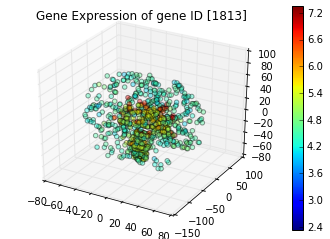

In [11]:
NV.visualize_ge([1813])

This may take a minute or two ...


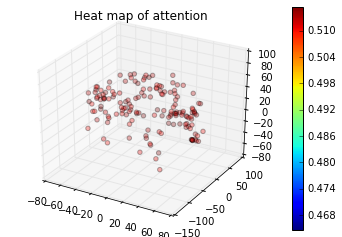

In [12]:
NV.visualize_ns('attention', alpha=.3)

(array([[ 1.       , -0.0882573],
        [-0.0882573,  1.       ]]),
 [-0.0013288032880511449, 0.015664542190155135])

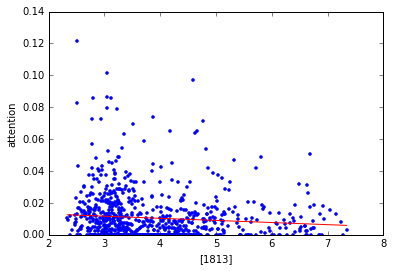

In [13]:
NV.lstsq_ns_ge('attention', [1813])

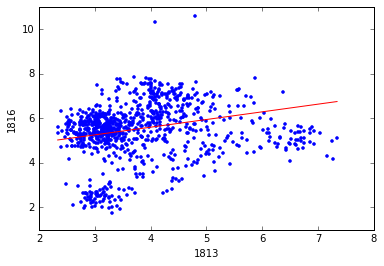

In [17]:
NV.lstsq_ge_ge(1813, 1816);

In [ ]:
NV.lstsq_ns_ns('attention', 'reward')